# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
 response = requests.get(query_url + city).json()

In [5]:
response

{'coord': {'lon': -147.8028, 'lat': 64.8569},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 8.53,
  'feels_like': 7.03,
  'temp_min': 5.18,
  'temp_max': 12.34,
  'pressure': 989,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 2.57, 'deg': 70},
 'clouds': {'all': 75},
 'dt': 1694886603,
 'sys': {'type': 1,
  'id': 7683,
  'country': 'US',
  'sunrise': 1694877364,
  'sunset': 1694924179},
 'timezone': -28800,
 'id': 5859699,
 'name': 'College',
 'cod': 200}

In [6]:
response['dt']

1694886603

In [7]:
# Set the API base UR
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | ca mau
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | baruun-urt
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | kunshan
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | richards bay
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | afaahiti
Processing Record 20 of Set 1 | hirara
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | isafjordur
Processing Recor

Processing Record 39 of Set 4 | flin flon
Processing Record 40 of Set 4 | katsuren-haebaru
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | badger
Processing Record 43 of Set 4 | fisterra
Processing Record 44 of Set 4 | akureyri
Processing Record 45 of Set 4 | santa ana de yacuma
Processing Record 46 of Set 4 | wynyard
Processing Record 47 of Set 4 | praia da vitoria
Processing Record 48 of Set 4 | eyl
Processing Record 49 of Set 4 | cidreira
Processing Record 0 of Set 5 | happy valley-goose bay
Processing Record 1 of Set 5 | tsiombe
Processing Record 2 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | chernogorsk
Processing Record 6 of Set 5 | newman
Processing Record 7 of Set 5 | neftegorsk
Processing Record 8 of Set 5 | quelimane
Processing Record 9 of Set 5 | beloyarskiy
Processing Record 10 of Set 5 | padang
Processing Record 11 of Set 5 | ti

Processing Record 30 of Set 8 | carnarvon
Processing Record 31 of Set 8 | maridi
Processing Record 32 of Set 8 | cooper's town
Processing Record 33 of Set 8 | lembar
City not found. Skipping...
Processing Record 34 of Set 8 | north bondi
Processing Record 35 of Set 8 | mokopane
Processing Record 36 of Set 8 | nova sintra
Processing Record 37 of Set 8 | tarauaca
Processing Record 38 of Set 8 | margate
Processing Record 39 of Set 8 | aksu
Processing Record 40 of Set 8 | tsumeb
Processing Record 41 of Set 8 | sao vicente
Processing Record 42 of Set 8 | castillos
Processing Record 43 of Set 8 | mogocha
Processing Record 44 of Set 8 | high rock
Processing Record 45 of Set 8 | luau
Processing Record 46 of Set 8 | shingu
Processing Record 47 of Set 8 | road town
Processing Record 48 of Set 8 | hermiston
Processing Record 49 of Set 8 | mitu
Processing Record 0 of Set 9 | nagqu
Processing Record 1 of Set 9 | utrik
Processing Record 2 of Set 9 | nemuro
Processing Record 3 of Set 9 | afumati
Proc

Processing Record 18 of Set 12 | kani keli
Processing Record 19 of Set 12 | el calafate
Processing Record 20 of Set 12 | vredendal
Processing Record 21 of Set 12 | waat
Processing Record 22 of Set 12 | ketchikan
Processing Record 23 of Set 12 | san sebastian de la gomera
Processing Record 24 of Set 12 | bolotnoye
Processing Record 25 of Set 12 | cumnock
Processing Record 26 of Set 12 | neufchateau
Processing Record 27 of Set 12 | voi
Processing Record 28 of Set 12 | tierra nueva
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-0.27,98,100,6.20,GS,1694886603
1,ca mau,9.1769,105.1500,24.94,90,55,1.68,VN,1694886603
2,invercargill,-46.4000,168.3500,9.45,83,100,3.13,NZ,1694886504
3,ilulissat,69.2167,-51.1000,4.01,70,75,2.57,GL,1694886604
4,dudinka,69.4058,86.1778,2.57,77,100,3.90,RU,1694886604


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-0.27,98,100,6.20,GS,1694886603
1,ca mau,9.1769,105.1500,24.94,90,55,1.68,VN,1694886603
2,invercargill,-46.4000,168.3500,9.45,83,100,3.13,NZ,1694886504
3,ilulissat,69.2167,-51.1000,4.01,70,75,2.57,GL,1694886604
4,dudinka,69.4058,86.1778,2.57,77,100,3.90,RU,1694886604


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

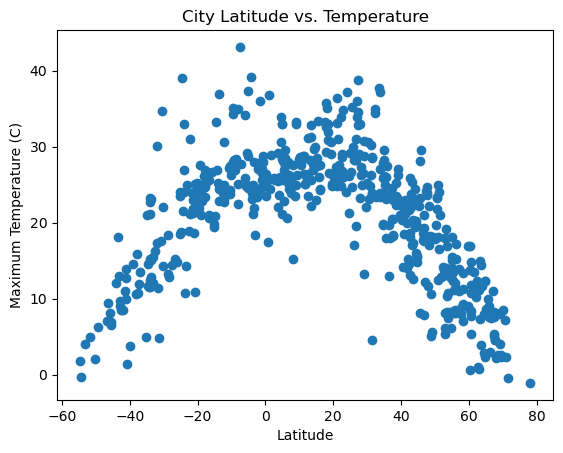

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

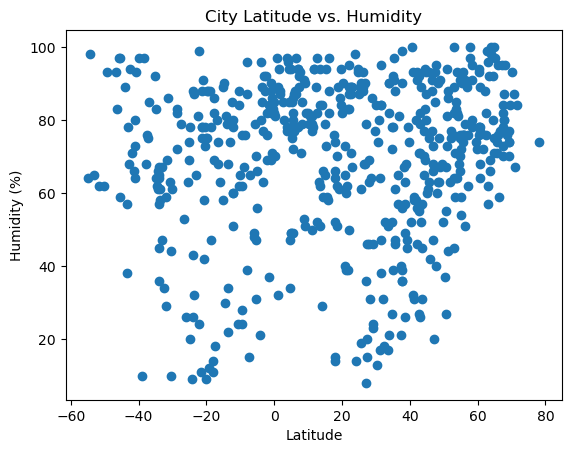

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

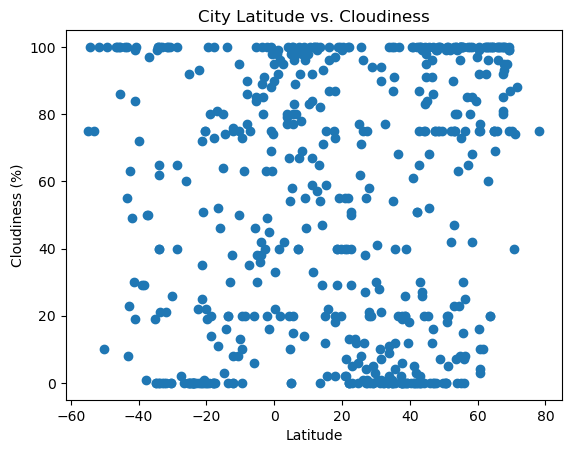

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

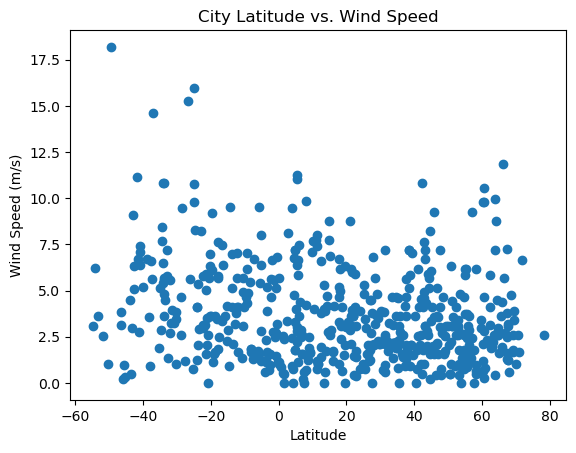

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots

def plots(df, x_var, y_var,x_axis, y_axis):
    correlation = st.pearsonr(df[x_var],df[y_var])[0]
    print(f'The r-value is {correlation} ')
    plt.scatter(df[x_var],df[y_var])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_var],df[y_var])
    regress_values = df[x_var] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,((.8*df[x_var].mean()),(.33* df[y_var].mean())),fontsize=15,color="red")
    plt.plot(df[x_var],regress_values,"r-")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ca mau,9.1769,105.1500,24.94,90,55,1.68,VN,1694886603
3,ilulissat,69.2167,-51.1000,4.01,70,75,2.57,GL,1694886604
4,dudinka,69.4058,86.1778,2.57,77,100,3.90,RU,1694886604
5,lihue,21.9789,-159.3672,26.31,89,0,3.60,US,1694886604
6,hadibu,12.6500,54.0333,26.43,82,57,6.60,YE,1694886604


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-0.27,98,100,6.20,GS,1694886603
2,invercargill,-46.4000,168.3500,9.45,83,100,3.13,NZ,1694886504
8,ushuaia,-54.8000,-68.3000,1.81,64,75,3.09,AR,1694886082
10,blackmans bay,-43.0167,147.3167,9.07,78,8,9.11,AU,1694886605
11,port-aux-francais,-49.3500,70.2167,6.28,93,100,18.19,TF,1694886605


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.7924484813875594 


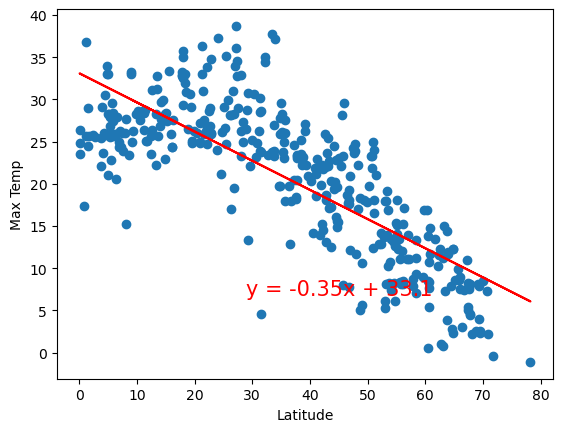

In [19]:
# Linear regression on Northern Hemisphere
plots(northern_hemi_df,'Lat','Max Temp','Latitude','Max Temp')

The r-value is 0.7817546543124713 


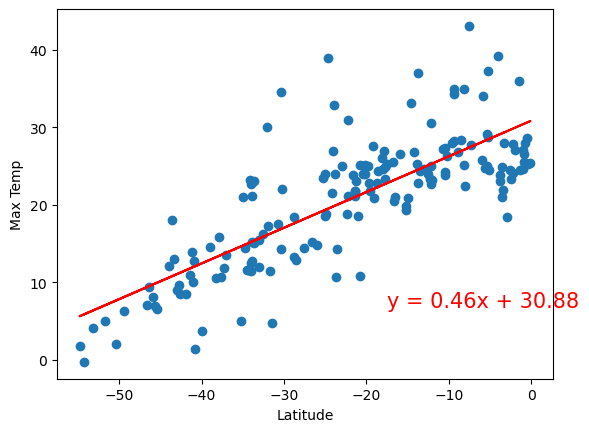

In [20]:
# Linear regression on Southern Hemisphere
plots(southern_hemi_df,'Lat','Max Temp','Latitude','Max Temp')

**Discussion about the linear relationship: There is an obvious linear relationship between Latiude and  Maximum Temperature. As Latitude  approaches zero, or the equator, the temperature increases. The relationship is strong with the correlation coefficent being ~.79 between the two plots (North and South of the equator). The regression equation can be interpreted as every degree increase in latitude north of the equator causes a ~(.38) decrease in temperature in Celsius. While a one degree increase in temperature south of the equator translates to ~.45 increase in temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.04661395336047219 


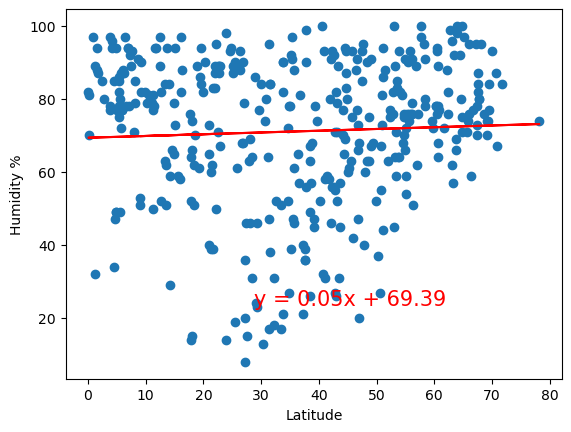

In [21]:
# Northern Hemisphere
plots(northern_hemi_df,'Lat','Humidity','Latitude','Humidity %')

The r-value is -0.03186083283988523 


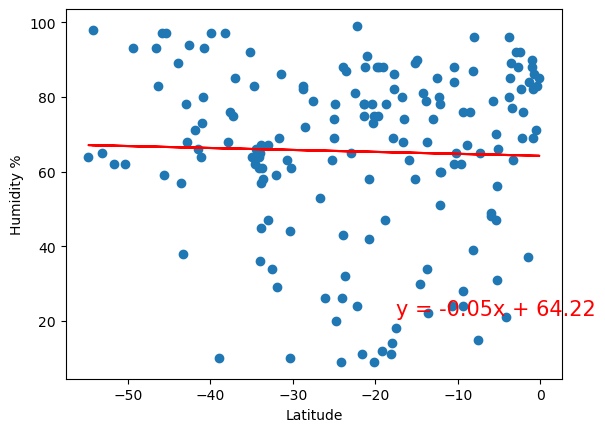

In [22]:
# Southern Hemisphere
plots(southern_hemi_df,'Lat','Humidity','Latitude','Humidity %')

**Discussion about the linear relationship:** The relationship between Latitude and Humidity seems insignigicant, with both having correlations near. This makes sense as factors such as elevation, rainfall, proximatity to specific bodies of water, as well others, are known to cause an increase in humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.09767605990790716 


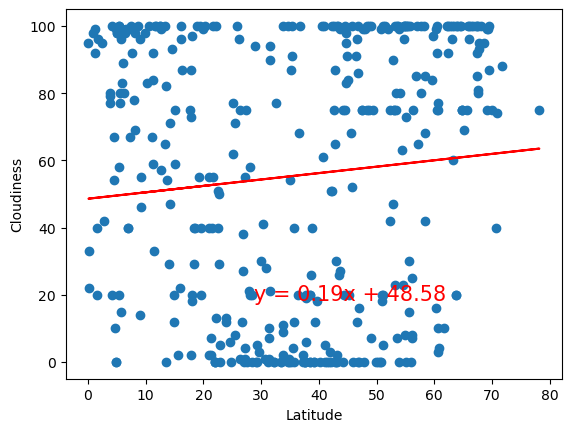

In [23]:
# Northern Hemisphere
plots(northern_hemi_df,'Lat','Cloudiness','Latitude','Cloudiness')

The r-value is -0.05073532762514869 


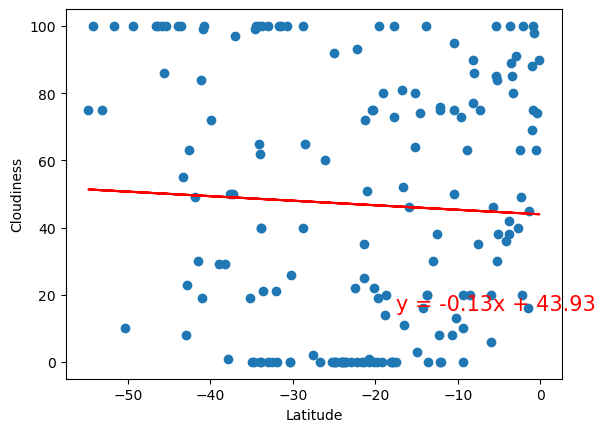

In [24]:
# Southern Hemisphere
plots(southern_hemi_df,'Lat','Cloudiness','Latitude','Cloudiness')

**Discussion about the linear relationship: It appears that there is no specific trend with percent cloudiness and the latitude of the city. Both have a relatively low correlation and no discernable pattern in the scatter plot. This makes logical sense as well since, like humidity, cloudiness is highly influenced by many other variables. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.046581830161616905 


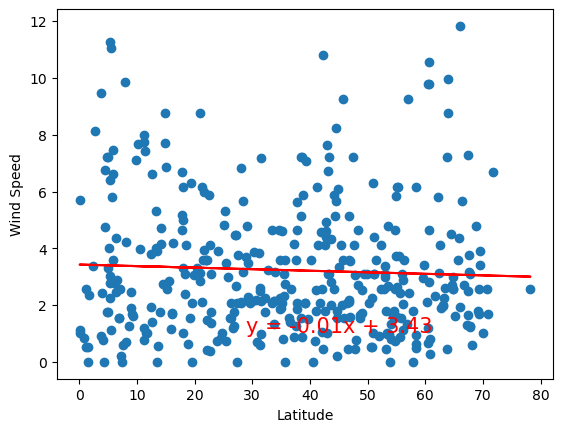

In [25]:
# Northern Hemisphere
plots(northern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed')

The r-value is -0.19329873908113726 


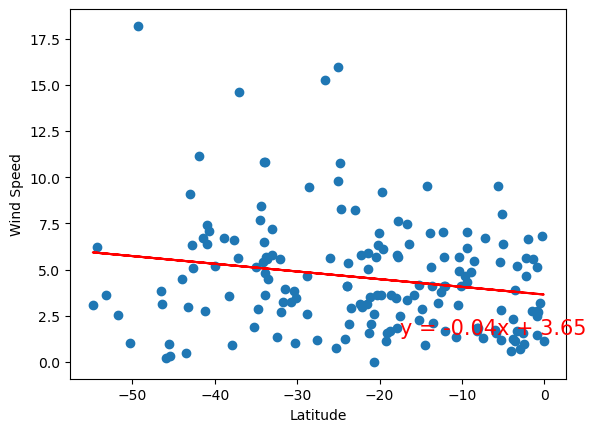

In [26]:
# Southern Hemisphere
plots(southern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed')

**Discussion about the linear relationship:It appears that there is no linear relationship with Windspeed and latitude as both hemispheres show an insignificant correlation for their respective plots. There does not appear to be a discernable patter either. Additionally, the graphs can be interpreted such that other factors, besides latitude, are more important for determining Wind speed.